In [264]:
import os
import sys
import numpy as np
import pandas as pd 
import math
import pdb
import matplotlib.pyplot as plt
import pickle
import csv
import re
import datetime
import seaborn as sns
import pymongo
pd.options.display.max_columns = None

from IPython.display import clear_output

from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing 
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals import joblib
import shap
# print the JS visualization code to the notebook
shap.initjs()
import sdkit

In [298]:
train= pd.read_excel('train_test.xlsx',sheet_name='train')

In [300]:
test= pd.read_excel('train_test.xlsx',sheet_name='test')

In [299]:
train.shape

(6361, 100)

In [301]:
test.shape

(3938, 99)

In [302]:
train['cust_period_yr'] = 2018-train['act_year']
test['cust_period_yr'] = 2018-train['act_year']

In [303]:
train.prov=train.prov.replace(0,'Unknown')
test.prov=test.prov.replace(0,'Unknown')

In [258]:
#test.max_cat_freq.str.replace('0','')
train.columns

Index(['ip_id', 'label', 'brth_yr', 'act_strt_dt', 'no_of_dpnd_chl',
       'cis_income', 'crn_bal', 'age', 'act_year', 'act_month',
       ...
       'spending_cat15__smooth', 'spending_cat16__smooth',
       'spending_cat2__smooth', 'spending_cat3__smooth',
       'spending_cat4__smooth', 'spending_cat5__smooth',
       'spending_cat6__smooth', 'spending_cat7__smooth',
       'spending_cat8__smooth', 'spending_cat9__smooth'],
      dtype='object', length=130)

In [304]:
#test.max_cat_freq.str.replace('0','')
print('train size:',train.drop(columns='label').shape)
print('test size:',test.shape)


#test.shape

train size: (6361, 100)
test size: (3938, 100)


In [305]:
#tmp=train.drop(columns='label')
df = train.drop(columns='label').append(test,sort=False)

In [306]:
df.iloc[0:6360,:]
df.iloc[6361:,:]

,ip_id,brth_yr,act_strt_dt,no_of_dpnd_chl,cis_income,crn_bal,age,act_year,act_month,act_day,gnd_cd,mar_st_cd,ctf_tp_cd,ocp_cd,spending_cat1,spending_cat10,spending_cat11,spending_cat12,spending_cat13,spending_cat14,spending_cat15,spending_cat16,spending_cat2,spending_cat3,spending_cat4,spending_cat5,spending_cat6,spending_cat7,spending_cat8,spending_cat9,max_cat_spending,cnt_card,card1,card2,card3,lag_freq_3th,lag_freq_6th,lag_spend_3th,lag_spend_6th,prov,chg_prv_time,spend_avg_mth,spend_med_mth,ratio_spd_mth,ratio2_spd_mth,CR_spd,DR_spd,ratio_CR_spend_used,CR,DR,ratio_CR_freq_used,ATM,Branch,CDM,CorporateConnect,EDC,KPlus,max_channel_active,avg_active_tm,std_active_tm,act_yymm,atm_ratio,branch_ratio,cdm_ratio,corp_con_ratio,edc_ratio,kplus_ratio,ratio_spnd_card1,ratio_spnd_card2,ratio_spnd_card3,freq_shop_cat1,freq_shop_cat10,freq_shop_cat11,freq_shop_cat12,freq_shop_cat13,freq_shop_cat14,freq_shop_cat15,freq_shop_cat16,freq_shop_cat2,freq_shop_cat3,freq_shop_cat4,freq_shop_cat5,freq_shop_cat6,freq_shop_cat7,freq_shop_cat8,freq_shop_cat9,max_cat_freq,ratio_cat16_freq,ratio_cat14_freq,ratio_cat1416_freq,ratio_cat4_freq,ratio_cat6_freq,ratio_spnd_cat14,ratio_spnd_cat16,ratio_spnd_cat4,ratio_spnd_cat6,ratio_spnd_cat1416,ratio_per_bln,ratio_per_bln_cred,cust_period_yr
0,6362,1985,2004-10-27,0,39723,101453,33,2004,10,27,1,1,4,12,0,0,0,0,0,16995,0,105011,0,0,0,0,0,0,0,0,cat16,1,122006,0,0,1,7,15246,108226,กทม.,1,30451.464000,0.0,0.766595,0.000000,1989502,2094580,0.487136,73,77,0.486667,68,3,14,12,0,53,ATM,10.000000,12.290918,200410,0.453333,0.020000,0.093333,0.080000,0.000000,0.353333,1.000000,0.000000,0.0,0,0,0,0,0,3,0,6,0,0,0,0,0,0,0,0,cat16,0.666667,0.333333,1.000000,0.000000,0.000000,0.139296,0.860704,0.000000,0.000000,1.000000,0.300153,19.610085,7
1,6363,1974,2012-05-23,0,36402,500,44,2012,5,23,2,1,4,3,0,0,0,0,0,0,0,30616,0,15148,6101,0,0,0,0,0,cat16,1,51865,0,0,0,2,0,21249,Unknown,0,17269.939844,0.0,0.474423,0.000000,676257,800377,0.457972,31,45,0.407895,17,2,18,0,1,38,KPlus,5.066667,7.150447,201205,0.223684,0.026316,0.236842,0.000000,0.013158,0.500000,1.000000,0.000000,0.0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,cat16,0.500000,0.000000,0.500000,0.250000,0.000000,0.000000,0.590302,0.117632,0.000000,0.590302,34.539880,1352.514000,8
2,6364,1983,2018-01-11,1,36457,11726,35,2018,1,11,2,1,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,0,0.000000,0.0,0.000000,0.000000,8779,0,1.000000,1,0,1.000000,0,1,0,0,0,0,Branch,0.066667,0.249444,201801,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748678,5
3,6365,1986,1998-03-03,0,43399,8723,32,1998,3,3,2,1,4,3,14316,0,46052,0,0,7114,6864,20261,0,11862,0,0,0,0,0,0,cat11,1,106469,0,0,3,6,38701,66868,กทม.,1,21288.051488,0.0,0.490519,0.000000,808266,914016,0.469299,25,44,0.362319,15,2,1,7,1,43,KPlus,4.600000,5.930711,199803,0.217391,0.028986,0.014493,0.101449,0.014493,0.623188,1.000000,0.000000,0.0,1,0,3,0,0,1,1,2,0,1,0,0,0,0,0,0,cat11,0.222222,0.111111,0.333333,0.000000,0.000000,0.066818,0.190300,0.000000,0.000000,0.257117,2.440451,92.659177,9
4,6366,1978,2013-03-17,0,31362,20812,40,2013,3,17,1,1,4,3,0,0,58391,0,0,0,0,0,0,0,0,0,0,0,0,0,cat11,1,58391,0,0,0,6,0,58391,Unknown,0,58391.000000,0.0,1.861839,0.000000,242020,206088,0.540093,23,24,0.489362,22,2,6,0,1,16,ATM,3.133333,3.862066,201303,0.468085,0.042553,0.127660,0.000000,0.021277,0.340426,1.000000,0.000000,0.0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,cat11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.805641,11.628868,12
5,6367,1973,2006-02-18,0,38229,19532,45,2006,2,18,2,2,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Unknown,0,0.000000,0.0,0.000000,0.000000,146562,110637,0.569839,9,9,0.500000,9,6,0,0,0,3,ATM,1.200000,1.758787,200602,0.500000,0.333333,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0

In [310]:
col=['gnd_cd',
   'mar_st_cd',
    'ctf_tp_cd',
    'ocp_cd',
    'max_cat_freq',
    'max_channel_active',
    'max_cat_spending',
    'prov']
col=['gnd_cd',
   'mar_st_cd',
    'ctf_tp_cd',
    'ocp_cd',
    'max_cat_freq',
    'max_channel_active',
    'max_cat_spending',
    'prov']
df[col]= df[col].astype(str)  
df.max_cat_freq=df.max_cat_freq.str.replace('0','-')
df.max_cat_spending=df.max_cat_spending.str.replace('0','-')

In [477]:
df

,ip_id,brth_yr,act_strt_dt,no_of_dpnd_chl,cis_income,crn_bal,age,act_year,act_month,act_day,gnd_cd,mar_st_cd,ctf_tp_cd,ocp_cd,spending_cat1,spending_cat10,spending_cat11,spending_cat12,spending_cat13,spending_cat14,spending_cat15,spending_cat16,spending_cat2,spending_cat3,spending_cat4,spending_cat5,spending_cat6,spending_cat7,spending_cat8,spending_cat9,max_cat_spending,cnt_card,card1,card2,card3,lag_freq_3th,lag_freq_6th,lag_spend_3th,lag_spend_6th,prov,chg_prv_time,spend_avg_mth,spend_med_mth,ratio_spd_mth,ratio2_spd_mth,CR_spd,DR_spd,ratio_CR_spend_used,CR,DR,ratio_CR_freq_used,ATM,Branch,CDM,CorporateConnect,EDC,KPlus,max_channel_active,avg_active_tm,std_active_tm,act_yymm,atm_ratio,branch_ratio,cdm_ratio,corp_con_ratio,edc_ratio,kplus_ratio,ratio_spnd_card1,ratio_spnd_card2,ratio_spnd_card3,freq_shop_cat1,freq_shop_cat10,freq_shop_cat11,freq_shop_cat12,freq_shop_cat13,freq_shop_cat14,freq_shop_cat15,freq_shop_cat16,freq_shop_cat2,freq_shop_cat3,freq_shop_cat4,freq_shop_cat5,freq_shop_cat6,freq_shop_cat7,freq_shop_cat8,freq_shop_cat9,max_cat_freq,ratio_cat16_freq,ratio_cat14_freq,ratio_cat1416_freq,ratio_cat4_freq,ratio_cat6_freq,ratio_spnd_cat14,ratio_spnd_cat16,ratio_spnd_cat4,ratio_spnd_cat6,ratio_spnd_cat1416,ratio_per_bln,ratio_per_bln_cred,cust_period_yr,gnd_cd__encode,mar_st_cd__encode,ctf_tp_cd__encode,ocp_cd__encode,max_cat_freq__encode,max_channel_active__encode,max_cat_spending__encode,prov__encode,lag_spend_3th__smooth,lag_spend_6th__smooth,lag_freq_3th__smooth,lag_freq_6th__smooth
0,1,1990,2011-12-11,0.0,45864.0,876428.0,28.0,2011,12,11,2,2,3,9,13333,2875,50453,3364,0,32269,51537,72797,55395,44862,45163,19225,25815,20501,20275,28558,cat16,3,305683,114261,66478,14.0,35.0,50911.0,150179.0,Unknown,0.0,34744.43,34744.428571,0.757553,0.757553,108186,92468,0.54,21,21,0.50,7,8,7,8,3,9,KPlus,2.80,1.833030,201112,0.17,0.19,0.17,0.19,0.07,0.21,0.63,0.23,0.14,4,1,7,1,0,9,8,13,9,9,10,3,7,5,5,7,cat16,0.132653,0.091837,0.224490,0.102041,0.071429,0.066340,0.149658,0.092847,0.053071,0.215998,0.04,0.12,7.0,1,1,2,10,7,6,7,0,10.8,11.9,2.7,3.6
1,2,1986,2010-06-08,1.0,43355.0,540649.0,32.0,2010,6,8,2,2,1,3,10152,3004,41695,0,1373,58746,9758,27585,43577,46002,17309,15582,12328,30248,9019,8731,cat14,3,163238,129303,42568,9.0,25.0,39875.0,92051.0,ลำพูน,1.0,23730.13,20843.000000,0.547345,0.480752,132896,97130,0.58,19,22,0.46,5,7,7,9,3,10,KPlus,2.73,1.611073,201006,0.12,0.17,0.17,0.22,0.07,0.24,0.49,0.39,0.13,2,1,7,0,1,14,6,5,8,8,5,5,2,9,4,3,cat14,0.062500,0.175000,0.237500,0.062500,0.025000,0.175304,0.082317,0.051652,0.036788,0.257621,0.04,0.25,8.0,1,1,0,4,5,6,5,47,10.6,11.4,2.3,3.3
2,3,1983,2013-12-06,0.0,48836.0,310503.0,35.0,2013,12,6,2,2,2,12,93283,0,61483,0,9204,50286,17289,37243,31824,65944,27985,10927,29405,38185,23422,8438,cat1,3,239214,188063,77641,9.0,31.0,64699.0,200568.0,Unknown,0.0,36150.67,37342.000000,0.740246,0.764641,88173,106546,0.45,17,25,0.40,9,10,1,11,2,9,CorporateConnect,2.80,1.681269,201312,0.21,0.24,0.02,0.26,0.05,0.21,0.47,0.37,0.15,13,0,11,0,3,13,5,8,5,9,5,3,4,7,5,1,cat1,0.086957,0.141304,0.228261,0.054348,0.043478,0.099592,0.073760,0.055425,0.058237,0.173353,0.12,0.28,5.0,1,1,1,2,1,4,1,0,11.1,12.2,2.3,3.5
3,4,1984,2009-12-27,0.0,44397.0,34209.0,34.0,2009,12,27,2,2,5,11,56724,0,20715,0,4213,61795,6937,18987,35546,9462,58138,41344,22750,65020,36972,17387,cat7,3,241518,139565,74907,8.0,27.0,41678.0,134905.0,Unknown,0.0,30303.45,28865.177083,0.682556,0.650161,66781,36645,0.65,16,18,0.47,6,5,4,6,5,8,KPlus,2.27,1.339983,200912,0.18,0.15,0.12,0.18,0.15,0.24,0.53,0.31,0.16,8,0,7,0,4,13,1,6,7,3,11,7,4,12,5,4,cat14,0.065217,0.141304,0.206522,0.119565,0.043478,0.135518,0.041639,0.127498,0.049891,0.177157,0.89,1.95,9.0,1,1,4,1,5,6,13,0,10.6,11.8,2.2,3.3
4,5,1986,2006-09-01,1.0,43281.0,39963.0,32.0,2006,9,1,2,3,6,9,67540,0,45938,0,2608,63083,5678,52239,48655,94661,51463,13580,3703,71952,0,27728,cat3,3,247088,229892,71848,12.0,35.0,75396.0,225230.0,Unknown,0.0,39295.13,40599.000000,0.907907,0.938033,85706,103308,0.45,16,

In [748]:
features_encoder = [
   'gnd_cd',
   'mar_st_cd',
    'ctf_tp_cd',
    'ocp_cd',
    'max_cat_freq',
    'max_channel_active',
    'max_cat_spending',
    'prov'
    
]

features_smooth = [
    
]

features_fill0 = [    
   'no_of_dpnd_chl',
   
   'lag_spend_3th',
    'lag_spend_6th',  
   
    'cis_income',
    'crn_bal',
    'cnt_card',
    'age',
    'ratio_CR_freq_used',
    'ratio_CR_spend_used',
    'CR_spd',
    'DR_spd',
    'chg_prv_time',
    #'ratio_cat16_freq',
    #'ratio_cat14_freq',
    #'ratio_cat1416_freq',
    #'ratio_cat4_freq',
    # 'ratio_cat6_freq',
    # 'ratio_spnd_cat14',
    #'ratio_spnd_cat16',
    # 'ratio_spnd_cat4',
    #'ratio_spnd_cat6',
    #'ratio_spnd_cat1416',
    'ratio_per_bln',
    'ratio_per_bln_cred',
    'cust_period_yr',
     # 'CR',
     #'DR',
     #'atm_ratio',
     #'branch_ratio',
     #'cdm_ratio',
     #'corp_con_ratio',
     #'edc_ratio',
     #'kplus_ratio',
     'ratio_spnd_card1',
     'ratio_spnd_card2',
     'ratio_spnd_card3',
     'avg_active_tm',
     'spend_avg_mth',
      
    
]

In [749]:
## train
features = [] 
encoders = {}

encoder = LabelEncoder()

for feature in features_encoder:
    encoder = LabelEncoder()
    series =  df[feature].fillna('NaN')
    encoder.fit(series)
    df[feature + '__encode'] = encoder.transform(series)
    encoders[feature] = encoder
features += list(map(lambda x: x + '__encode', features_encoder))


df[features_fill0] = df[features_fill0].fillna(0).round(2).astype(float)
features += features_fill0

for feature in features_smooth:
    df[feature + '__smooth'] = np.log(1 + df[feature]).round(1).fillna(0)
features += list(map(lambda x: x + '__smooth', features_smooth))

In [750]:
#X[features].spend_avg_mth.min()

#X_dev[features].spend_avg_mth.median()

In [751]:
X=df.iloc[0:6361,:]
X=X[features]
X_dev=df.iloc[6361:,:]
df.iloc[6361:,:]
X_dev=X_dev[features]

In [752]:

y = train.label


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

#X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=100, stratify=y_test)

In [753]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from xgboost.sklearn import XGBClassifier
import lightgbm as lgb

from sklearn.metrics import f1_score

def f1(y_true, y_pred):
    y_pred = y_pred > 0.5
    return 'f1', f1_score(y_true, y_pred), True

def tune_score_model(model, param_grid, X, y, cv=3):
    if model.__class__.__name__ == 'LGBMClassifier':
        cv_depth = []
        grid = ParameterGrid(param_grid)
        for i, params in enumerate(grid):
            eval_hist = lgb.cv(params, 
                               lgb.Dataset(X, y), 
                               num_boost_round=300, 
                               nfold=5, 
                               early_stopping_rounds=5, 
                               stratified=True, 
                               verbose_eval=False)

            result = {}
            for key in eval_hist.keys():
                name, value = key.split('-')
                result[value] = eval_hist[key][-1]
            result['params'] = params

            cv_depth.append(result)
        
        cv_depth = pd.DataFrame.from_dict(cv_depth)
        grid = cv_depth.sort_values('mean', ascending=True).reset_index().loc[0]
        grid.best_score_ = grid['mean']
        grid.best_params_ = grid['params']
    else:
        grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', n_jobs=4, verbose=1, cv=cv)
        grid.fit(
            X=X, 
            y=y,
        )
    
    #Returns the best score and params used to get the score
    return grid.best_score_, grid.best_params_, cv_depth

In [754]:
#Models to run along with any variables that we want to specify
model_obj = [
#   { 
#     'clf': RandomForestClassifier(random_state=29), 
#     'param_grid': {
#         "n_estimators": [300],
#         "max_depth": [None],
#         "max_features": [5],
#         "min_samples_split": [5],
#         "min_samples_leaf": [3],
#         "bootstrap": [False],
#         "criterion": ['entropy'],
#         "class_weight": [{0:1, 1:15}]
#     }
#   }, 
#   { 
#     'clf': XGBClassifier(random_state=29), 
#     'param_grid': {
#         "max_depth": [3, 7],
#         "colsample_bylevel": [0.8],
#         "colsample_bytree": [0.8],
#         "scale_pos_weight": [15]
#     }
#   }, 
  { 
    'clf': lgb.LGBMClassifier(), 
    'param_grid': {
        'task': ['train'],
        'boosting_type': ['dart'],
        'objective': ['binary'],
        'metric': [{'binary_logloss'}],
        'learning_rate':  [0.01],
        'max_depth': [-1,3,7,11],
        'num_leaves': [21,31,127],
        #'min_child_weight': [0.001],
        'min_data_in_leaf': [20],
        'subsample': [0.8,0.7],
        'colsample_bytree': [0.8],
        'is_unbalance': [True],
         'reg_lambda': [0.01],
        'reg_alpha':[0.01],
       # 'n_estimators':[300,500]    
    }
  }
#  ,{ 
#    'clf': lgb.LGBMClassifier(), 
#    'param_grid': {
#        'task': ['train'],
#        'boosting_type': ['dart'],
#        'objective': ['binary'],
#        'metric': [{'binary_logloss'}],
#        'learning_rate': [0.1, 0.001, 0.003],
#        'max_depth': [-1, 7],
#        'num_leaves': [31, 127],
#        'min_child_weight': [0.001],
#        'min_data_in_leaf': [20],
#        'subsample': [0.8, 1],
#        'colsample_bytree': [0.8, 1],
#        'is_unbalance': [True],
#        'reg_alpha':[0.001],
#       'n_estimators':[100, 200, 300, 400, 500]    
#    }
#  }  
    
]

#Initialize as empty lists
best_scores = []
best_params = []
best_grids = []

#Look through all the models and run the tune_score_model function (if set to True). 
#The results of the function are saved to the best_scores and best_params lists
n_out = 0
for i in range(len(model_obj)):  
    best_scores.append(n_out)
    best_params.append(n_out)
    best_grids.append(n_out)
    print(model_obj[i]['clf'].__class__)
    best_scores[n_out], best_params[n_out], best_grids[n_out] = tune_score_model(
        model_obj[i]['clf'], 
        model_obj[i]['param_grid'], 
        X_train.append(X_test), 
        y_train.append(y_test)
    )
    n_out = n_out + 1
    
model_output = pd.DataFrame(
    {'models': [val['clf'].__class__.__name__ for val in model_obj], 
     'best_scores': best_scores, 'best_params': best_params}, 
    columns=['models', 'best_scores', 'best_params']).sort_values(by='best_scores', ascending=False)
model_output

<class 'lightgbm.sklearn.LGBMClassifier'>


,models,best_scores,best_params
0,LGBMClassifier,0.12214,"{'subsample': 0.8, 'min_data_in_leaf': 20, 'ma..."


In [755]:
model_output[model_output['models'] == 'LGBMClassifier']['best_params'].values[0]

{'boosting_type': 'dart',
 'colsample_bytree': 0.8,
 'is_unbalance': True,
 'learning_rate': 0.01,
 'max_depth': -1,
 'metric': {'binary_logloss'},
 'min_data_in_leaf': 20,
 'num_leaves': 21,
 'objective': 'binary',
 'reg_alpha': 0.01,
 'reg_lambda': 0.01,
 'subsample': 0.8,
 'task': 'train'}

In [784]:
params=model_output[model_output['models'] == 'LGBMClassifier']['best_params'].values[0].copy()
params['metric'] = 'binary_logloss'
#params['learning_rate'] = 0.001
params['min_data_in_leaf'] = 100

In [785]:
metric = 'binary_logloss'
clf = lgb.LGBMClassifier(**params)
clf=clf.fit(
    X=X_train, 
    y=y_train,
    eval_metric=metric,
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=5,
    verbose=True,
    categorical_feature=[i for i, x in enumerate(X.columns) if re.search(r'__encode$', x) != None],
)

[1]	training's binary_logloss: 0.23073	valid_1's binary_logloss: 0.231223
Training until validation scores don't improve for 5 rounds.
[2]	training's binary_logloss: 0.222133	valid_1's binary_logloss: 0.222719
[3]	training's binary_logloss: 0.214535	valid_1's binary_logloss: 0.215205
[4]	training's binary_logloss: 0.207719	valid_1's binary_logloss: 0.208464
[5]	training's binary_logloss: 0.201534	valid_1's binary_logloss: 0.202256
[6]	training's binary_logloss: 0.195863	valid_1's binary_logloss: 0.196649
[7]	training's binary_logloss: 0.190629	valid_1's binary_logloss: 0.191394
[8]	training's binary_logloss: 0.193262	valid_1's binary_logloss: 0.193999
[9]	training's binary_logloss: 0.188205	valid_1's binary_logloss: 0.188999
[10]	training's binary_logloss: 0.183493	valid_1's binary_logloss: 0.184341
[11]	training's binary_logloss: 0.179082	valid_1's binary_logloss: 0.179911
[12]	training's binary_logloss: 0.180934	valid_1's binary_logloss: 0.181796
[13]	training's binary_logloss: 0.176

/Users/apichaya/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/lightgbm/basic.py:1153: UserWarning: categorical_feature in Dataset is overridden. New categorical_feature is [0, 1, 2, 3, 4, 5, 6, 7]
  warnings.warn('categorical_feature in Dataset is overridden. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


lightGBM with parameter optimization:
Best Threshold: 0.34485777235611786
Best TPR: 1.0
Best FPR: 0.0
Precision: [ 0.99957974  1.        ]
Recall: [ 1.         0.9939577]
F-score: [ 0.99978983  0.9969697 ]
Support: [4757  331]
Accuracy: 0.9996069182389937
AUC: 1.0
Confusion Matrix:
[[4757    0]
 [   2  329]]


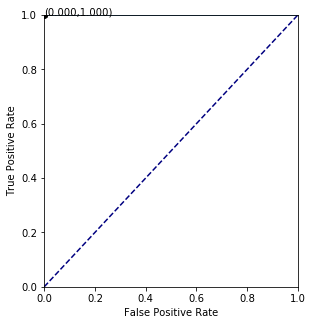

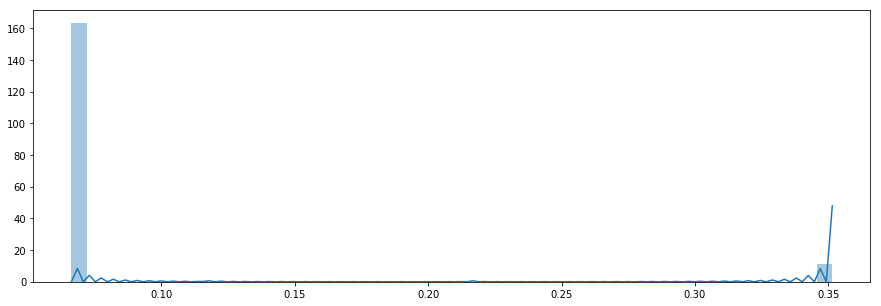

In [786]:
print ("lightGBM with parameter optimization:")
y_train_pred_proba = clf.predict_proba(X_train)[:,1]

best_threshold_train = sdkit.evaluation.plot_ROC(y_train.values, y_train_pred_proba)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.distplot(y_train_pred_proba, ax=ax)

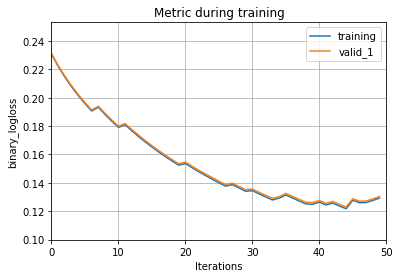

In [787]:
lgb.plot_metric(clf)

In [788]:
print ("lightGBM with parameter optimization")
y_test_dev_proba = clf.predict_proba(X_dev)[:,1]
y_test_pred_proba = clf.predict_proba(X_test)[:,1]
#best_threshold_test = sdkit.evaluation.plot_ROC(y_test.values, y_test_pred_proba)
#fig, ax = plt.subplots(1, 1, figsize=(15, 5))
#sns.distplot(y_dev_pred_proba, ax=ax)

lightGBM with parameter optimization


In [789]:
y_prob=pd.DataFrame(y_test_dev_proba, columns=['prob']) 

In [790]:
y_prob.to_csv('TJ2018-AUDITION-[10324].csv',header=False)

In [792]:
y_prob

,prob
0,0.069942
1,0.069942
2,0.066292
3,0.069942
4,0.122545
5,0.066292
6,0.069942
7,0.069942
8,0.069942
9,0.069942


In [739]:
#y_prob
#X_dev
X_test.index()
predictions[6361:] = y_test_pred_proba

TypeError: 'Int64Index' object is not callable

In [653]:
m = RandomForestClassifier(n_jobs=-1, max_depth=31, min_samples_leaf = 21)
predictions = np.zeros(y.shape) #creating an empty prediction array

In [640]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

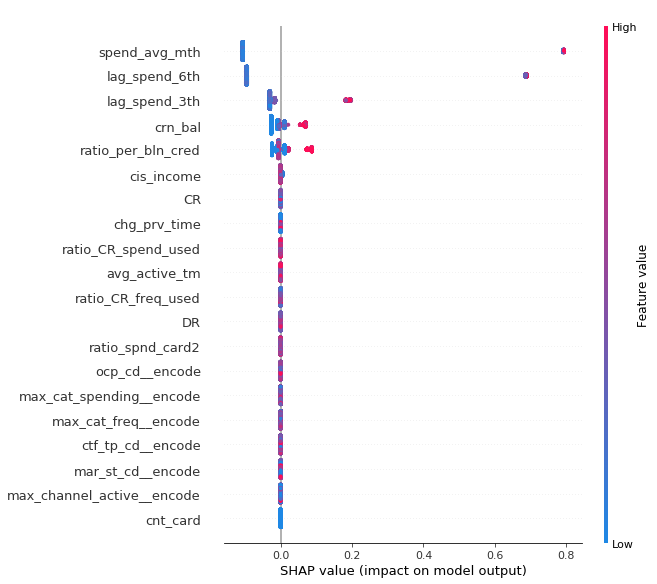

In [641]:
shap.summary_plot(shap_values, X_train)

                       feature       gain  split
27               spend_avg_mth  35.288525     19
10               lag_spend_6th  27.332618     14
17                      CR_spd  26.302083     13
18                      DR_spd  11.003217      7
11                  cis_income   0.044706      5
16         ratio_CR_spend_used   0.010096      9
26               avg_active_tm   0.007217      1
9                lag_spend_3th   0.007216      1
14                         age   0.003288      3
15          ratio_CR_freq_used   0.001033      1
8               no_of_dpnd_chl   0.000000      0
19                chg_prv_time   0.000000      0
2            ctf_tp_cd__encode   0.000000      0
25            ratio_spnd_card3   0.000000      0
24            ratio_spnd_card2   0.000000      0
23            ratio_spnd_card1   0.000000      0
22              cust_period_yr   0.000000      0
21          ratio_per_bln_cred   0.000000      0
20               ratio_per_bln   0.000000      0
3               ocp_

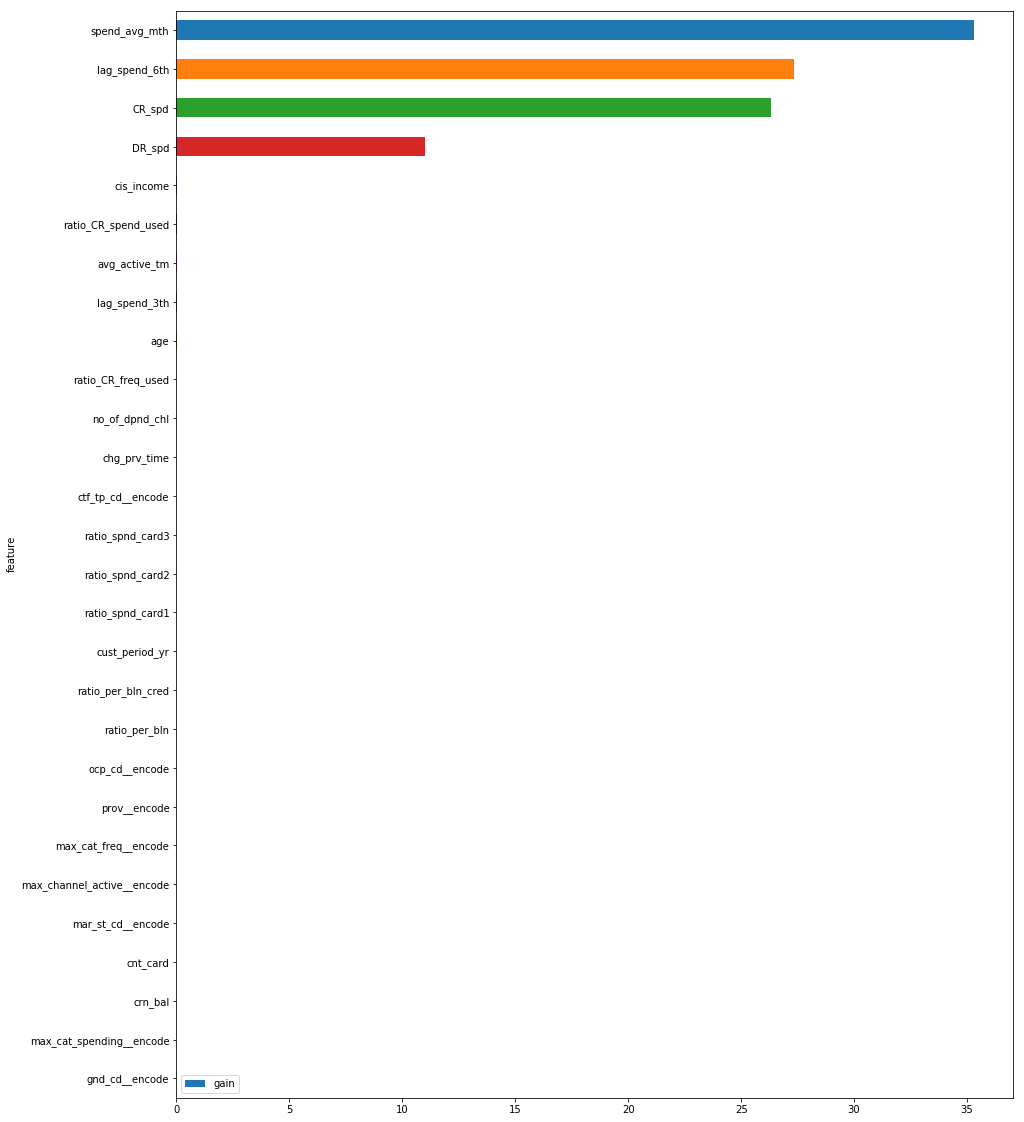

In [773]:
gain = clf.booster_.feature_importance('gain')
ft = pd.DataFrame({
    'feature': clf.booster_.feature_name(), 
    'split': clf.booster_.feature_importance('split'), 
    'gain': 100 * gain / gain.sum()
}).sort_values('gain', ascending=False)
print(ft.head(30))
ax = ft.iloc[:50].plot(kind='barh', x='feature', y='gain', figsize=(15,20))
ax.invert_yaxis()

In [650]:
#X=df.iloc[0:6361,:]
#X=X[features]
#X_dev=df.iloc[6361:,:]
#df.iloc[6361:,:]
#X_dev=X_dev[features]


X['is_train']=1
X_dev['is_train']=0

cmb = X.append(X_dev,sort=False)



In [652]:
y = cmb ['is_train'].values #labels
x = cmb.drop('is_train', axis=1).values #covariates or our independent variables
tst, trn = X_dev.values, X.values

In [688]:
predictions_train = predictions[len(X_train):] 
weights = (1./predictions_train)-1. 
weights /= np.mean(weights)

/Users/apichaya/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/apichaya/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [690]:
weights

array([ nan,  nan,  nan, ...,   0.,   0.,   0.])

In [700]:
#clf.fit(X_train, y_train, sample_weight=weights)